# Exploring the Dynamics of Transportation in Ireland & Abroad🚂

**Name:** 
Stephen Hasson

**Student No:** 
sba23014

**Student Email:**
sba23014@student.cct.ie

**Course:** 
CCT MSC in Data Analytics

**Assignment:**
MSC_DA_CA2

**Year:**
Sept-23 Intake

## Table of Contents

### [Time-Series Forecasting](#time-series-forecasting)
### [Data Understanding Phase & Data Preparation Phase](#data_understanding_phase)
### [Modelling Phase & Evaluation Phase](#modelling_phase)
### [Deplopyment-Phase](#deployment_phase)
***

<a id='time-series-forecasting'></a>
###  Time Series Forecasting
***
*"Time series forecasting is the process of analyzing time series data using statistics and modeling to make predictions and inform strategic decision-making"* (2023, Tableau)

Below Image Credit (2023, Nguyen)

In [2]:
# Suppress warning messages
import warnings
warnings.filterwarnings('ignore')

# Suppress deprecation warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    display(HTML('<center><img src="https://raw.githubusercontent.com/tn16jv/Stock-Price-Prediction/master/Images/NewPrediction.png" width=600 height=300 /></center>'))


NameError: name 'HTML' is not defined

##  Notebook Requirements

In [3]:
# Export requirements.txt file
# !pip freeze > requirements.txt

In [4]:
# Import EDA & visualisation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

# Display all columns of the pandas df
pd.set_option('display.max_columns', None)

# Configure default colour scheme for seaborn
sns.set(color_codes = True)

# Suppress warning messages
import warnings
warnings.filterwarnings('ignore')

For the purpose of enhanced readability, dependency clarity and easier debugging I have centralised all of the Python libraries and default settings used in this analysis at the beginning of my code. I will explain why specific libraries have been used as appropriate as they are utilised in the clode.

I have chosen to remove the default column restrictions with regards to the Pandas DataFrame (df) so that it will be easier to review all of the series in the one cell.

The option to suppress warning messages was applied as a default setting retrospectively once analysis was complete, the rationale for this decision is to help enhance readability by eliminating non-critical alerts and streamlining output display.

I used the below 4 core libraries as my primary libraries for data analysis & visualisation:

* **Pandas** - I used this library as it makes it really easy to load and manipulate structured data through the use of Pandas dataframes & it has a lot of great functions for data cleaning & transformation which allows me to get my data ready for deeper analysis and modelling. 
* **Numpy** - I used this library for it's numerical functions & for it's ability to prepare data in particular for Machine Learning modelling due to the different data structures required for those models such as arrays and matrices. 
* **Matplotlib** - I used this library when I need to plot more low level detailed data visualisation that Seaborn is too high level to provide. It gives me a great level of customisation though generally is more tedious & time consuming to produce effective visualisations than Seaborn. 
* **Seaborn** - I prefer to use Seaborn as it's an easier, more efficient & aesthetically pleasing method for plotting data visualisations when I don't require the deeper level of customisation or detail that some visualisations need.

**References**:
* https://pandas.pydata.org/
* https://numpy.org/
* https://matplotlib.org/
* https://seaborn.pydata.org/

<a id='data_understanding_phase'></a>
##  Data Understanding Phase & Data Preparation Phase

#### Pre-Processed GSK Daily Stock Price Data

In [5]:
# Create variable to store the raw url of cso dataset uploaded to personal github account
df_url = 'https://raw.githubusercontent.com/sba23014/cct_msc_data_analytics/main/s2_ca1/pyspark_df_part-00000-ea201b3a-d704-4c4d-9b19-1eba8ce2e065-c000.csv'

# Read file from github url into Pandas DataFrame (df)
df = pd.read_csv(df_url)

# Return first 5 rows to validate 'data' df creation
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day,DailyChange,PriceTrend
0,1980-03-28,0.000000,0.149641,0.139201,0.139201,2400,0.0,0.0,1980,3,28,0.139201,Up
1,1980-03-31,0.139201,0.139201,0.139201,0.139201,0,0.0,0.0,1980,3,31,0.000000,Down
2,1980-04-01,0.139201,0.139201,0.139201,0.139201,0,0.0,0.0,1980,4,1,0.000000,Down
3,1980-04-02,0.000000,0.149641,0.139201,0.139201,800,0.0,0.0,1980,4,2,0.139201,Up
4,1980-04-03,0.139201,0.139201,0.139201,0.139201,0,0.0,0.0,1980,4,3,0.000000,Down


#### Pre-Processed GSK Aggregated Stock Price Data

In [6]:
# Create variable to store the raw url of cso dataset uploaded to personal github account
df_grouped_url = 'https://raw.githubusercontent.com/sba23014/cct_msc_data_analytics/main/s2_ca1/pyspark_df_grouped_part-00000-578a57f7-32d7-4116-a2ea-40bdaa806f1e-c000.csv'

# Read file from github url into Pandas DataFrame (df)
df_grouped = pd.read_csv(df_grouped_url)

# Return first 5 rows to validate 'data' df creation
df_grouped.head()

,Year,Month,TotalVolume,MaxHigh,MinLow,AvgClose
0,1990,7,35596600,3.86,3.48,3.68
1,1997,11,8155100,14.67,12.73,13.77
2,2022,10,125076700,31.56,28.06,29.47
3,1980,8,42400,0.16,0.14,0.15
4,1987,10,65422000,3.25,1.76,2.56


In [7]:
df.shape

(11079, 13)

In [8]:
# df size
total_data_points = 11079

In [9]:
# Calculate the split index, based on a training/testing split of 80:20
split_index = int(total_data_points * 0.8)

In [10]:
# Split the data whilst maintaining the sequence
training_data = df[:split_index]
testing_data = df[split_index:]

In [11]:
# Validate length of training & testing df splits
print(f"Training Data Size: {len(training_data)}")
print(f"Testing Data Size: {len(testing_data)}")

Training Data Size: 8863
Testing Data Size: 2216


In [12]:
training_data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day,DailyChange,PriceTrend
8858,2015-05-13,28.638762,28.721679,28.396384,28.402761,4185000,0.577,0.0,2015,5,13,-0.236000,Down
8859,2015-05-14,28.721680,28.798222,28.568602,28.696169,3080400,0.000,0.0,2015,5,14,-0.025512,Down
8860,2015-05-15,28.472922,28.581355,28.345355,28.555841,2348200,0.000,0.0,2015,5,15,0.082919,Up
8861,2015-05-18,28.428286,28.651527,28.415529,28.485691,2646500,0.000,0.0,2015,5,18,0.057405,Up
8862,2015-05-19,28.402762,28.613248,28.377250,28.498438,2640500,0.000,0.0,2015,5,19,0.095676,Up


In [13]:
testing_data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day,DailyChange,PriceTrend
11074,2024-03-04,42.040001,42.439999,42.020000,42.439999,2404300,0.0,0.0,2024,3,4,0.399998,Up
11075,2024-03-05,42.630001,42.779999,42.490002,42.599998,2635200,0.0,0.0,2024,3,5,-0.030003,Down
11076,2024-03-06,42.380001,42.709999,42.330002,42.619999,3247400,0.0,0.0,2024,3,6,0.239998,Up
11077,2024-03-07,43.680000,43.840000,43.480000,43.580002,4382300,0.0,0.0,2024,3,7,-0.099998,Down
11078,2024-03-08,43.020000,43.220001,42.910000,43.139999,3308100,0.0,0.0,2024,3,8,0.119999,Up


In [14]:
training_data = training_data.iloc[:, 4].values

print(training_data)

[ 0.1392013   0.1392013   0.1392013  ... 28.55584145 28.48569107
 28.49843788]


In [15]:
type(training_data)

numpy.ndarray

In [16]:
scaler = MinMaxScaler()

In [17]:
training_data = scaler.fit_transform(training_data.reshape(-1, 1))

In [18]:
x_training_data = []
y_training_data =[]

In [19]:
for i in range(40, len(training_data)):
    x_training_data.append(training_data[i-40:i, 0])
    y_training_data.append(training_data[i, 0])

In [20]:
x_training_data = np.array(x_training_data)
y_training_data = np.array(y_training_data)

In [21]:
print(x_training_data.shape)
print(y_training_data.shape)

(8823, 40)
(8823,)


In [22]:
x_training_data = np.reshape(x_training_data, (x_training_data.shape[0], 
                                               x_training_data.shape[1], 
                                               1))

In [23]:
print(x_training_data.shape)

(8823, 40, 1)


In [24]:
rnn = Sequential()

In [25]:
rnn.add(LSTM(units = 45, return_sequences = True, input_shape = (x_training_data.shape[1], 1)))

In [26]:
rnn.add(Dropout(0.2))

In [27]:
rnn.add(LSTM(units = 45, return_sequences = True))

rnn.add(Dropout(0.2))

rnn.add(LSTM(units = 45, return_sequences = True))

rnn.add(Dropout(0.2))

rnn.add(LSTM(units = 45))

rnn.add(Dropout(0.2))

In [28]:
rnn.add(Dense(units = 1))

In [29]:
rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [30]:
rnn.fit(x_training_data, y_training_data, epochs = 100, batch_size = 32)

Epoch 1/100
276/276 [==============================] - 16s 38ms/step - loss: 0.0067
Epoch 2/100
276/276 [==============================] - 10s 38ms/step - loss: 0.0022
Epoch 3/100
276/276 [==============================] - 11s 38ms/step - loss: 0.0019
Epoch 4/100
276/276 [==============================] - 10s 38ms/step - loss: 0.0017
Epoch 5/100
276/276 [==============================] - 10s 38ms/step - loss: 0.0015
Epoch 6/100
276/276 [==============================] - 10s 38ms/step - loss: 0.0014
Epoch 7/100
276/276 [==============================] - 10s 38ms/step - loss: 0.0014
Epoch 8/100
276/276 [==============================] - 10s 38ms/step - loss: 0.0013
Epoch 9/100
276/276 [==============================] - 10s 38ms/step - loss: 0.0012
Epoch 10/100
276/276 [==============================] - 10s 37ms/step - loss: 0.0012
Epoch 11/100
276/276 [==============================] - 11s 38ms/step - loss: 0.0011
Epoch 12/100
276/276 [==============================] - 12s 43ms/step - lo

276/276 [==============================] - 11s 38ms/step - loss: 6.1821e-04
Epoch 94/100
276/276 [==============================] - 11s 38ms/step - loss: 6.1471e-04
Epoch 95/100
276/276 [==============================] - 11s 38ms/step - loss: 6.3912e-04
Epoch 96/100
276/276 [==============================] - 10s 38ms/step - loss: 6.0274e-04
Epoch 97/100
276/276 [==============================] - 11s 38ms/step - loss: 5.7790e-04
Epoch 98/100
276/276 [==============================] - 11s 38ms/step - loss: 6.1088e-04
Epoch 99/100
276/276 [==============================] - 10s 37ms/step - loss: 5.8872e-04
Epoch 100/100
276/276 [==============================] - 10s 38ms/step - loss: 6.1761e-04


In [31]:
testing_data = testing_data.iloc[:, 4].values

print(testing_data)

[28.62600136 29.05973816 28.86838341 ... 42.61999893 43.58000183
 43.13999939]


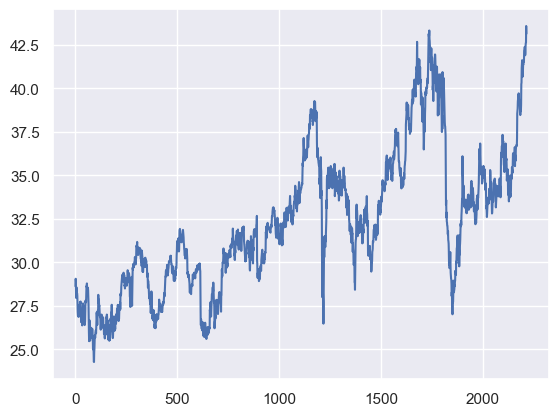

In [32]:
plt.plot(testing_data)

In [33]:
testing_data = np.reshape(testing_data, (-1, 1))

In [34]:
testing_data_v2 = testing_data[len(testing_data) - len(testing_data) - 40:].values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
len(testing_data_v2)

In [68]:
testing_data = scaler.transform(testing_data)

In [70]:
final_testing_data = []

for i in range(40, len(testing_data)):

    final_testing_data.append(testing_data[i-40:i, 0])

final_testing_data = np.array(final_testing_data)

In [71]:
final_testing_data = np.reshape(final_testing_data, (final_testing_data.shape[0], final_testing_data.shape[1],1))

In [72]:
predictions = rnn.predict(final_testing_data)

68/68 [==============================] - 2s 14ms/step


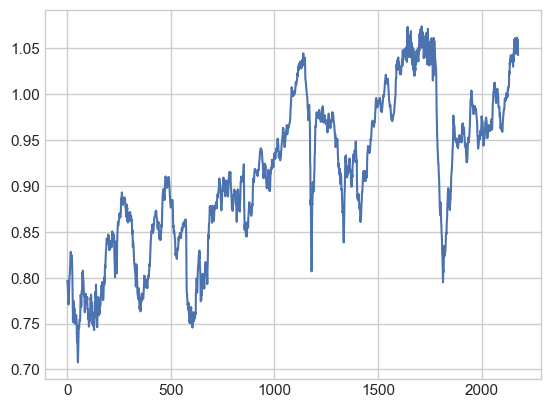

In [99]:
plt.plot(predictions)

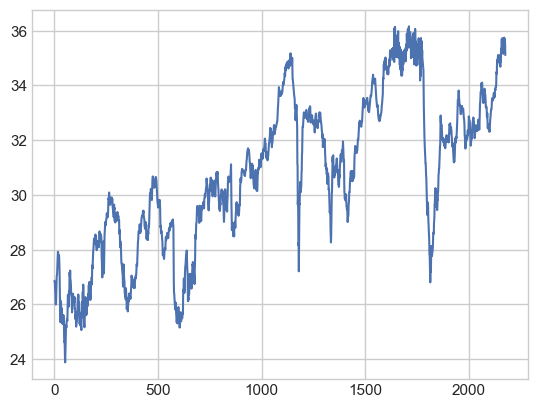

In [98]:
unscaled_predictions = scaler.inverse_transform(predictions)

plt.plot(unscaled_predictions)

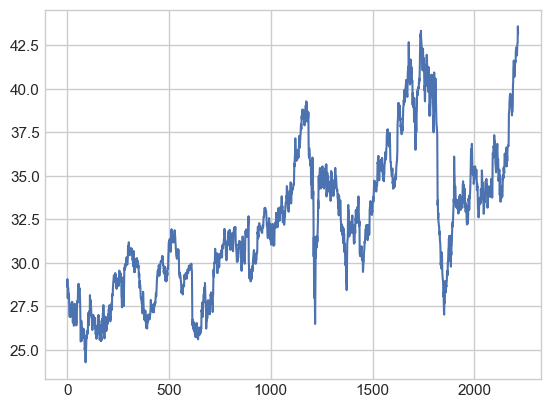

In [97]:
unscaled_testing_data = scaler.inverse_transform(testing_data)

plt.plot(unscaled_testing_data)

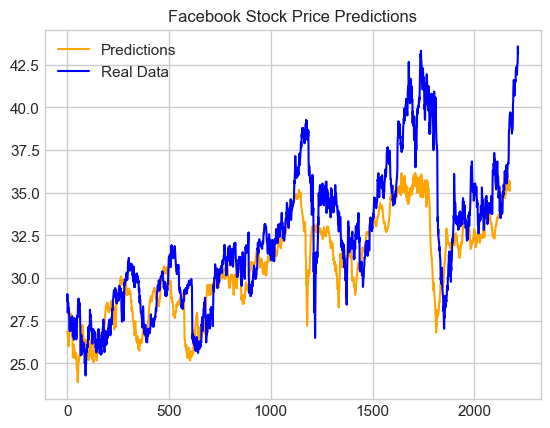

In [96]:
# Apply the Seaborn Whitegrid style
plt.style.use('seaborn-whitegrid')

plt.plot(unscaled_predictions, color = 'orange', label = "Predictions")

plt.plot(unscaled_testing_data, color = 'blue', label = "Real Data")

plt.title('Facebook Stock Price Predictions')

plt.legend()

In [85]:
print("The first trading day price prediction is for Jan 2020 is: ",unscaled_predictions[0])
print("The real first trading day price for Jan 2020 is: ",unscaled_testing_data[0])

The first trading day price prediction is for Jan 2020 is:  [26.858156]
The real first trading day price for Jan 2020 is:  [28.62600136]


In [91]:
print("The last trading day price prediction is for Jan 2020 is: ",unscaled_predictions[2175])
print("The real last trading day price for Jan 2020 is: ",unscaled_testing_data[2175])

The last trading day price prediction is for Jan 2020 is:  [35.10634]
The real last trading day price for Jan 2020 is:  [39.60287857]
